# Activité sur le clustering

<img src="https://cdn.pixabay.com/photo/2019/07/06/18/06/flowers-4320891_1280.jpg" alt="hortensia" width="400"/>

## Activité de recherche d'informations

- Quelles sont les métriques de qualité d'un algorithme de clustering ?

- Quels sont les principaux hyperparamètres de l'algorithme de K-means clustering ?

- Quels sont les principaux hyperparamètres de l'algorithme de DBSCAN ?

- Quelles sont les différences entre l'algorithme de K-means clustering et de DBSCAN ?

- Qu'est-ce que la méthode du coude pour le modèle de K-means ?

- Qu'est-ce que le coefficient de silhouette ?

- Qu'est-ce que l'indice de Rand ?

## Ressources

- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

- https://fr.wikipedia.org/wiki/Indice_de_Rand

## Partie 1 : analyse et préparation des données

- Récupérer les données du fichier "penguins.csv" dans un dataframe pandas

- Faire une analyse statistique et graphique des données. En particulier, analyser la séparabilité des classes suivant les différentes caractéristiques

- Standardiser les caractéristiques

- Supprimer la caractéristique "Espèce"

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("penguins.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Espèce                           342 non-null    object 
 1   Longueur du bec (en mm)          342 non-null    float64
 2   Epaisseur du bec (en mm)         342 non-null    float64
 3   Longueur de la nageoire (en mm)  342 non-null    float64
 4   Masse (en g)                     342 non-null    float64
dtypes: float64(4), object(1)
memory usage: 13.5+ KB


In [19]:
df["Espèce"] = df["Espèce"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Espèce                           342 non-null    category
 1   Longueur du bec (en mm)          342 non-null    float64 
 2   Epaisseur du bec (en mm)         342 non-null    float64 
 3   Longueur de la nageoire (en mm)  342 non-null    float64 
 4   Masse (en g)                     342 non-null    float64 
dtypes: category(1), float64(4)
memory usage: 11.3 KB


In [3]:
df.describe()

Longueur du bec (en mm)  Epaisseur du bec (en mm)  \
count               342.000000                342.000000   
mean                 43.921930                 17.151170   
std                   5.459584                  1.974793   
min                  32.100000                 13.100000   
25%                  39.225000                 15.600000   
50%                  44.450000                 17.300000   
75%                  48.500000                 18.700000   
max                  59.600000                 21.500000   

       Longueur de la nageoire (en mm)  Masse (en g)  
count                       342.000000    342.000000  
mean                        200.915205   4201.754386  
std                          14.061714    801.954536  
min                         172.000000   2700.000000  
25%                         190.000000   3550.000000  
50%                         197.000000   4050.000000  
75%                         213.000000   4750.000000  
max                         231.000000   6300.000000

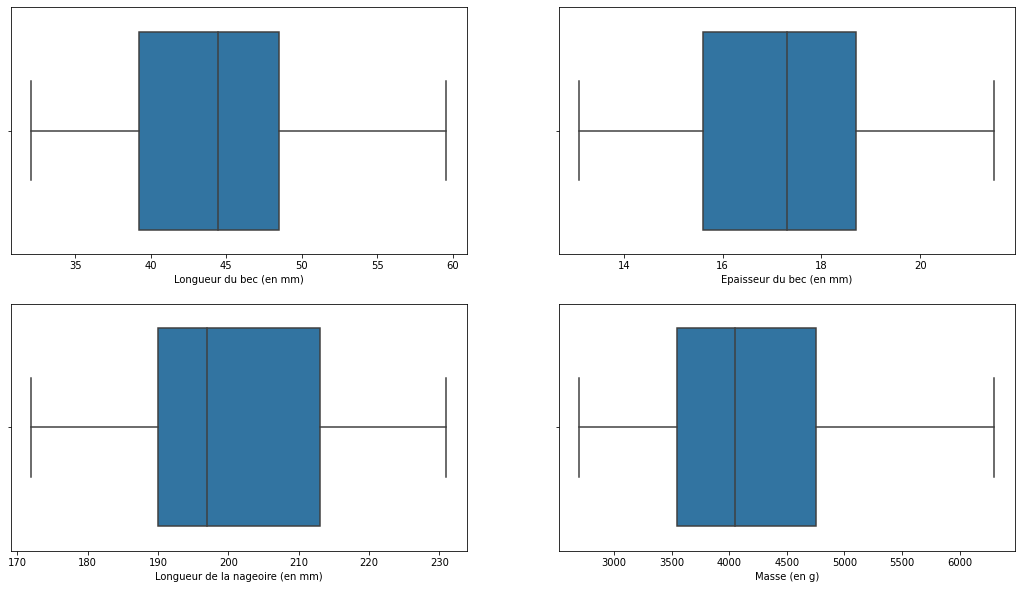

In [14]:
def show_chart(df):
    fig, axes = plt.subplots(2, 2, figsize=(18, 10))
    sns.boxplot(ax=axes[0, 0], data=df, x='Longueur du bec (en mm)')
    sns.boxplot(ax=axes[0, 1], data=df, x='Epaisseur du bec (en mm)')
    sns.boxplot(ax=axes[1, 0], data=df, x='Longueur de la nageoire (en mm)')
    sns.boxplot(ax=axes[1, 1], data=df, x='Masse (en g)')
    plt.show()
show_chart(df)

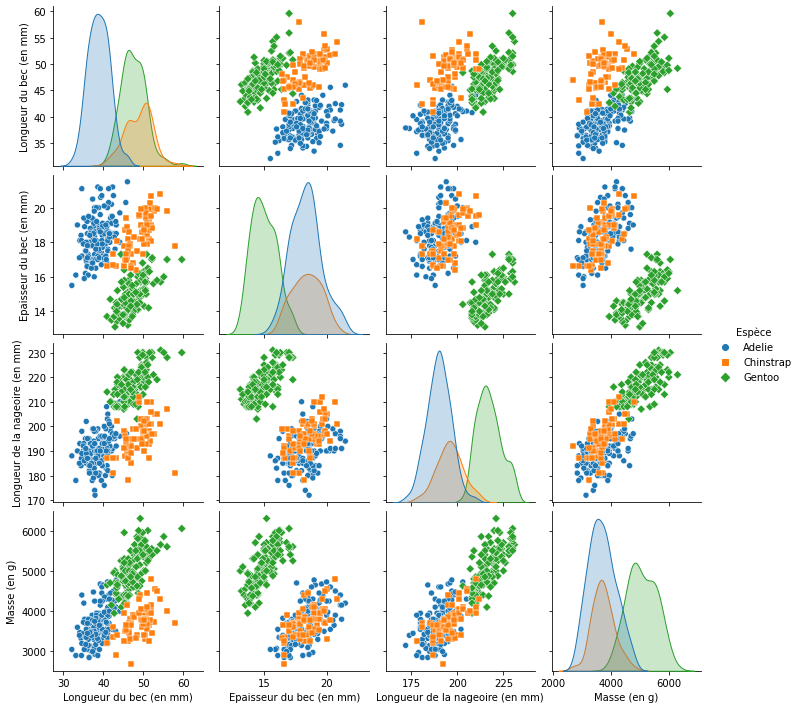

In [21]:
sns.pairplot(df, hue="Espèce", markers=["o", "s", "D"])
plt.show()

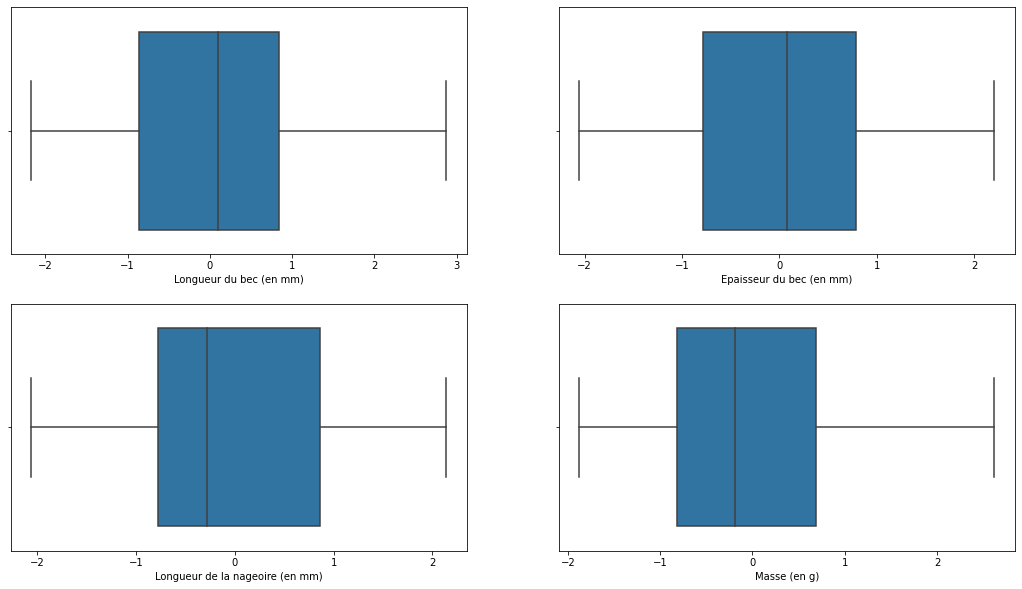

In [18]:
scaler = StandardScaler()
temp_df = df.drop("Espèce", axis=1)
df_std = pd.DataFrame(scaler.fit_transform(temp_df), columns=temp_df.columns)
show_chart(df_std)

## Distribution normale

In [37]:
# Approche statistique
print("Coefficient d'asymétrie : skewness (symétrie = 0)")
print(df_std.skew())
print("Coefficient d'aplatissement : kurtosis (standard = 0)")
print(df_std.kurtosis())

Coefficient d'asymétrie : skewness (symétrie = 0)
Longueur du bec (en mm)            0.053118
Epaisseur du bec (en mm)          -0.143465
Longueur de la nageoire (en mm)    0.345682
Masse (en g)                       0.470329
dtype: float64
Coefficient d'aplatissement : kurtosis (standard = 0)
Longueur du bec (en mm)           -0.876027
Epaisseur du bec (en mm)          -0.906866
Longueur de la nageoire (en mm)   -0.984273
Masse (en g)                      -0.719222
dtype: float64


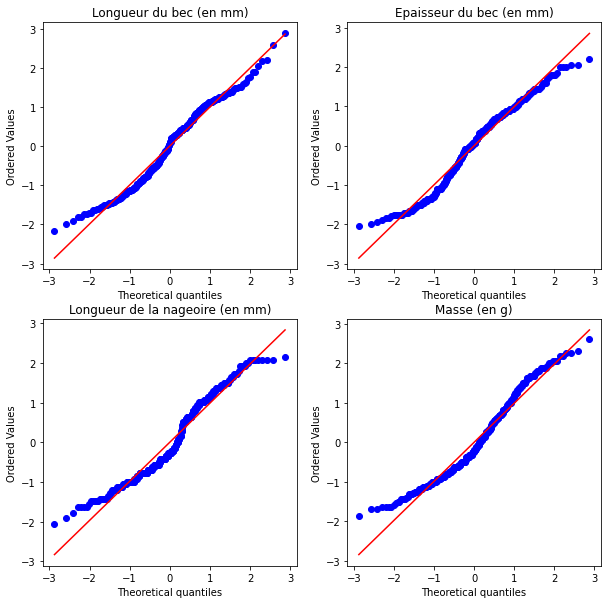

In [36]:
# Approche graphique
from scipy import stats

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
stats.probplot(df_std["Longueur du bec (en mm)"], plot=axes[0,0])
axes[0,0].set_title("Longueur du bec (en mm)")
stats.probplot(df_std["Epaisseur du bec (en mm)"], plot=axes[0,1])
axes[0,1].set_title("Epaisseur du bec (en mm)")
stats.probplot(df_std["Longueur de la nageoire (en mm)"], plot=axes[1,0])
axes[1,0].set_title("Longueur de la nageoire (en mm)")
stats.probplot(df_std["Masse (en g)"], plot=axes[1,1])
axes[1,1].set_title("Masse (en g)")
plt.show()

## Partie 2 : K-means clustering

- Entrainer un modèle de K-means clustering avec 3 clusters (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

- Afficher l'inertie du modèle

- Calculer l'inertie du modèle K-means pour différentes valeurs de K. Tracer l'inertie du modèle en fonction de K. Trouver la valeur optimale de K à l'aide de la méthode du coude (elbow method)

- Calculer le coefficient de silhouette pour 3 clusters

- Faire une recherche d'hyperparamètres par grille pour trouver le nombre optimal de clusters en fonction du coefficient de silhouette (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

- Créer des graphiques de coefficients de silhouette pour différentes valeurs de K (https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) et confirmer le résultat de la question précédente

- Utiliser les classes réelles pour calculer l'indice de Rand (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.rand_score.html) et l'indice de Rand ajusté (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)

In [93]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.cm as cm

In [40]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_std)
print(kmeans.score(df_std))
print(kmeans.inertia_)

-379.3925027555175
379.3925027555175


In [47]:
inertia={}
for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_std)
    inertia[i]=kmeans.inertia_
print(inertia)

{2: 565.7076453796291, 3: 379.3925027555175, 4: 300.41001294250293, 5: 232.597319793654, 6: 204.3925995701031, 7: 187.06950675376953, 8: 171.511238516967, 9: 158.9959834983216, 10: 149.35714064155573, 11: 143.85391627128092, 12: 138.1229767336059, 13: 129.61391917957866, 14: 125.360629965868}


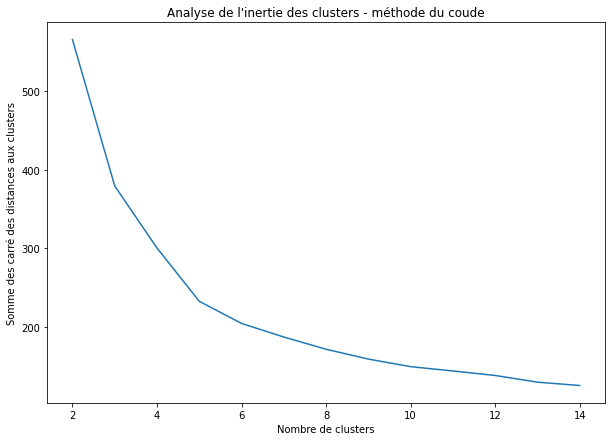

In [57]:
plt.figure(figsize=(10, 7))
plt.plot(inertia.keys(), inertia.values())
plt.xlabel("Nombre de clusters")
plt.ylabel("Somme des carré des distances aux clusters")
plt.title("Analyse de l'inertie des clusters - méthode du coude")
plt.show()

In [59]:
kmeans = KMeans(n_clusters=3, random_state=0)
predictions = kmeans.fit_predict(df_std)
silhouette_score(df_std, predictions)

0.4472192983966046

In [60]:
silhouette={}
for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    predictions = kmeans.fit_predict(df_std)
    silhouette[i] = silhouette_score(df_std, predictions)
print(silhouette)

{2: 0.5315403219473027, 3: 0.4472192983966046, 4: 0.4001539442100519, 5: 0.3782379454052037, 6: 0.3679964175998302, 7: 0.3309607654049, 8: 0.2855515539701506, 9: 0.2834331428881314, 10: 0.28642850815129184, 11: 0.2682448617237243, 12: 0.24488909797564243, 13: 0.25353629197637784, 14: 0.24286318241349802}


In [71]:
kmeans = KMeans(random_state=0)
param_grid = {"n_clusters": range(2, 15)}
grid_search = GridSearchCV(
    kmeans,
    param_grid,
    cv=3,
)
grid_search.fit(df_std)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_clusters': 14}
-111.97678430098405


In [76]:
def s_score(estimator, X):
    labels = estimator.fit_predict(X)
    score = silhouette_score(X, labels, metric='euclidean')
    return score

kmeans = KMeans(random_state=0)
param_grid = {"n_clusters": range(2, 15)}
grid_search = GridSearchCV(
    kmeans,
    param_grid,
    scoring=s_score,
    cv=2,
)
grid_search.fit(df_std)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_clusters': 2}
0.5902331882396414


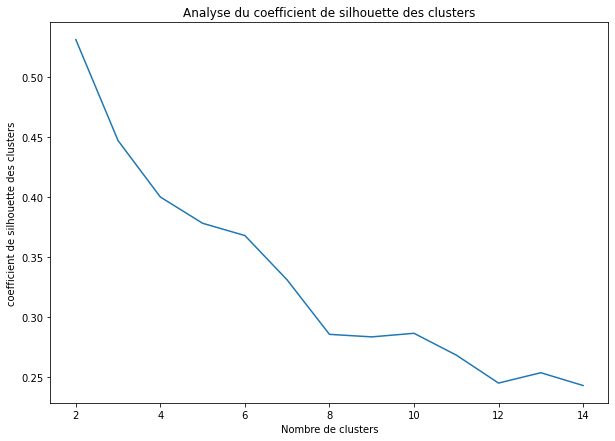

In [61]:
plt.figure(figsize=(10, 7))
plt.plot(silhouette.keys(), silhouette.values())
plt.xlabel("Nombre de clusters")
plt.ylabel("coefficient de silhouette des clusters")
plt.title("Analyse du coefficient de silhouette des clusters")
plt.show()

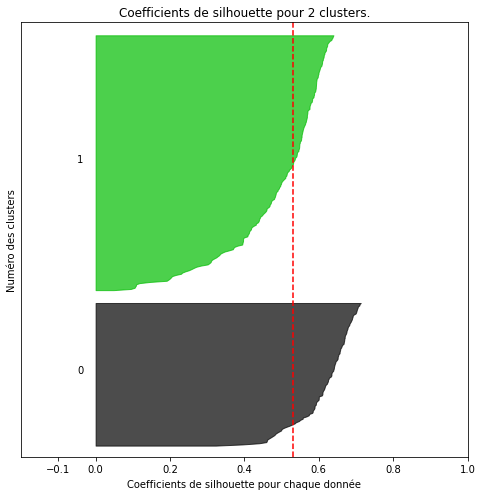

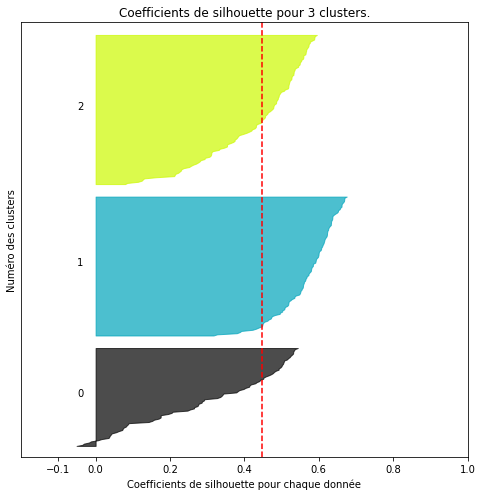

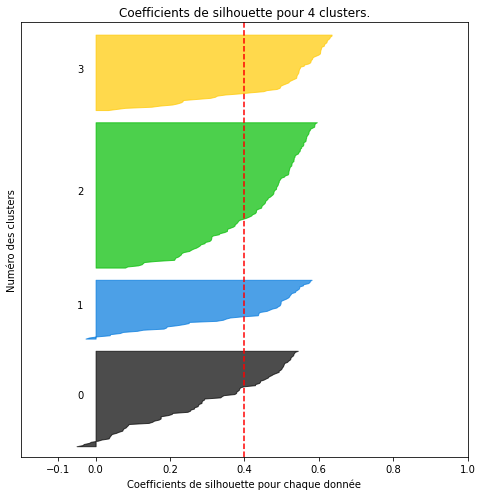

In [92]:
for n_clusters in range(2, 5):
    # Création du graphique
    fig, ax = plt.subplots(1, 1, figsize=(8,8))
    ax.set_xlim([-0.2, 1])
    ax.set_ylim([0, len(df_std) + (n_clusters + 1) * 10])
    # Création du modèle de Kmeans
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_std)
    # Coefficient de silhouette moyen
    silhouette_avg = silhouette_score(df_std, cluster_labels)
    # Coefficient de silhouette individuel
    sample_silhouette_values = silhouette_samples(df_std, cluster_labels)
    # Positionnement du début du cluster sur l'axe y
    y_lower = 10
    # Affichage des différents clusters
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        # Positionnement du cluster sur l'axe y
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        # Choix de la couleur du cluster
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        # Ajout du numéro des clusters
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Décalage de 10 pour une séparation entre les 2 clusters
        y_lower = y_upper + 10
    
    # Ajout du titre et des légendes
    ax.set_title(f"Coefficients de silhouette pour {n_clusters} clusters.")
    ax.set_xlabel("Coefficients de silhouette pour chaque donnée")
    ax.set_ylabel("Numéro des clusters")
    # Ligne verticale pour le coefficient de silhouette moyen
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    # Echelles des axes x et y
    ax.set_yticks([])
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [96]:
kmeans = KMeans(n_clusters=3, random_state=0)
predictions = kmeans.fit_predict(df_std)
print(rand_score(predictions, df["Espèce"]))
print(adjusted_rand_score(predictions, df["Espèce"]))

0.9055066797002281
0.7928369051321087


## Partie 3 : DBSCAN

- Entrainer un modèle de DBSCAN et analyser les résultats

- Faire une recherche d'hyperparamètres par grille en optimisant le coefficient de silhouette

- Visualiser les données sur un graphique à l'aide de la librairie seaborn :

```python
sns.scatterplot(
    x='Longueur du bec (en mm)', 
    y='Epaisseur du bec (en mm)',
    data=df, 
    hue=y,
    style=db.labels_,
    palette=['orange', 'green', 'blue'])
```

- Entrainer un modèle des k plus proches voisins (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html) pour calculer la distance de chacun des points à son plus proche voisin. Visualiser les données sur un graphique

In [133]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [167]:
dbscan = DBSCAN(eps=0.8, min_samples=4)
predictions = dbscan.fit_predict(df_std)
silhouette_score(df_std, predictions)

0.47727424817936037

In [168]:
predictions

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [120]:
def s_score(estimator, X):
    labels = estimator.fit_predict(X)
    score = silhouette_score(X, labels, metric='euclidean')
    return score

dbscan = DBSCAN()
param_grid = {
    "eps" : np.linspace(0.5, 2, 20),
    "min_samples" : range(2, 10),
}
grid_search = GridSearchCV(
    dbscan,
    param_grid,
    scoring=s_score,
    cv=2,
)
grid_search.fit(df_std)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'eps': 1.526315789473684, 'min_samples': 2}
0.5902331882396414


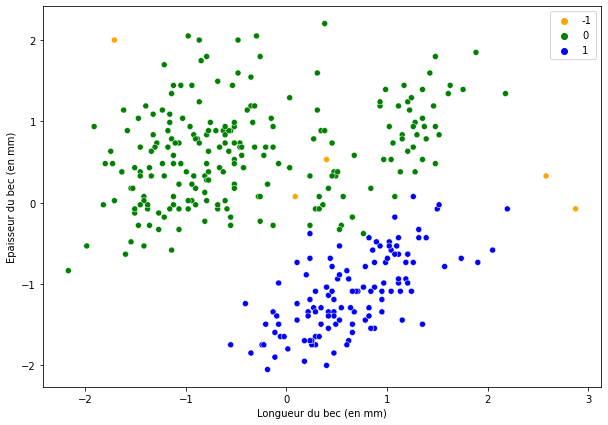

In [155]:
dbscan = DBSCAN(eps=0.8, min_samples=4)
predictions = dbscan.fit_predict(df_std)

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='Longueur du bec (en mm)', 
    y='Epaisseur du bec (en mm)',
    data=df_std, 
    hue=predictions,
    palette=['orange', 'green', 'blue'])
plt.show()

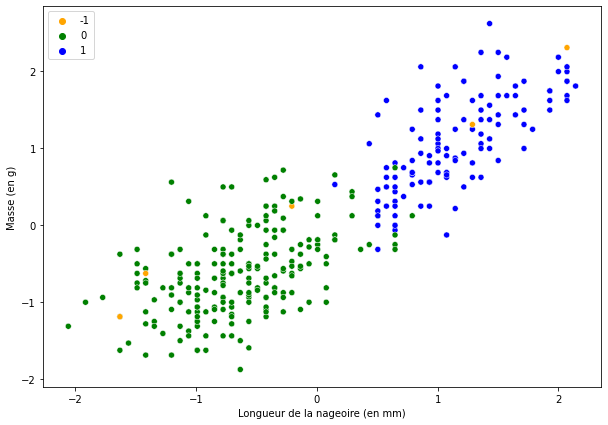

In [172]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='Longueur de la nageoire (en mm)', 
    y='Masse (en g)',
    data=df_std, 
    hue=predictions,
    palette=['orange', 'green', 'blue'])
plt.show()

In [169]:
df_std.columns

Index(['Longueur du bec (en mm)', 'Epaisseur du bec (en mm)',
       'Longueur de la nageoire (en mm)', 'Masse (en g)'],
      dtype='object')

In [150]:
predictions

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

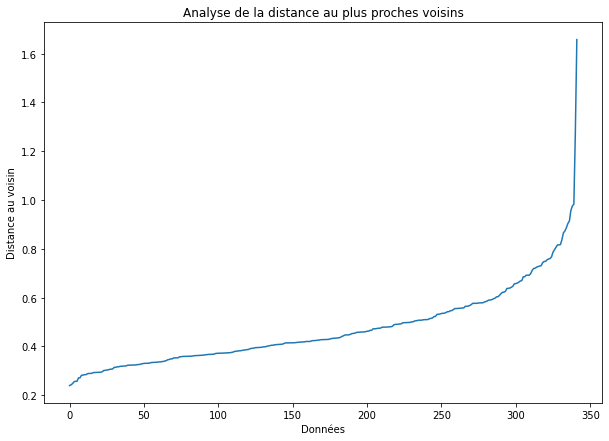

In [176]:
plt.figure(figsize=(10, 7))
knn = NearestNeighbors(n_neighbors=5)
knn.fit(df_std)
dist, ind = knn.kneighbors(df_std)
dist = np.sort(dist, axis=0)[:,3]
plt.plot(dist)
plt.xlabel("Données")
plt.ylabel("Distance au voisin")
plt.title("Analyse de la distance au plus proches voisins")
plt.show()